# Problem 1 Logistic Regression

## 1.1 Fit a logistic regression model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

class LogisticRegressionGD:
    def __init__(self, lr=0.01, fit_intercept=True, max_epoch=1e5, tolerance=1e-7, verbose=True):
        self.lr = lr
        self.fit_intercept = fit_intercept
        self.max_epoch = max_epoch
        self.tolerance = tolerance
        self.verbose = True

    def add_intercept(self, X):
        # add an extra column for the intercept
        intercept = np.ones([X.shape[0], 1])
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # calculate the loss
        # return the loss
        p = self.sigmoid(h * self.theta)
        loss = - 1/n * (np.dot(y.T, np.log(p)) - np.dot((1 - y).T, np.log(1 - p)))
        return loss

    def fit(self, X, y):
        '''
        Parameters
        ----------
        X : shape (n_samples, n_features)
            Training data
        y : shape (n_samples,)
            Target values, 1 or 0
        epochs : The number of epochs
        '''

        # initialize the parameters
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # initialize the coefficients
        self.theta = np.zeros((X.shape[1], 1))

        tol = 1e10
        n_epoch = 1
        while tol > self.tolerance and n_epoch <= self.max_epoch:
            old_theta = self.theta.copy()
            
            # TODO:
            # calculate predictions
            # pred.shape: [n_samples, 1]
            p = self.sigmoid(np.dot(X, self.theta))
            
            # calculate gradients
            # grad.shape:  [n_features, 1]
            #-1/n\sum (y-p)x
            n = X.shape[0]
            grad = - 1/n * (np.dot(X.T, (y - p)))
            
            # update the coefficients
            self.theta = self.theta - self.lr * grad
            
            # END
            
            n_epoch += 1
            tol = np.sum(np.abs(self.theta - old_theta))

    def predict(self, X, threshold):
        """
        Parameters
        ----------
        X : shape (n_samples, n_features)
        threshold : threshold for make decision
        Returns
        -------
        y : shape (n_samples,)
            Predicted class label per sample, 1 or 0
        """
        
        # add the intercept to X
        X = self.add_intercept(X)
        # get the prediction y
        y = int(self.sigmoid(X * self.theta) > threshold)
        # return prediction y
        return y

In [2]:
# read the data, transform the target variable y to 0/1 value
X_data = pd.read_csv('logistic_x.csv', header = None).values
y_data = pd.read_csv('logistic_y.txt', header = None).values
y_data = (y_data + 1) / 2

In [3]:
# fit the model using the data, and print out the model coefficients w
# we include the intercept term, so w is a vector with 3 components
# print out the model coeffcients
myRegression = LogisticRegressionGD()
myRegression.fit(X_data, y_data)
print("Model coefficients: w0/intercept = %s, w1 = %s, w2 = %s"%(myRegression.theta[0], myRegression.theta[1], myRegression.theta[2]))

Model coefficients: w0/intercept = [-2.62004691], w1 = [0.76026934], w2 = [1.17191257]


## 1.2 Plot the training data and the decision boundary

Coefficients of linear decision boundary: intercept = [2.23570168], slope = [-0.64874237]


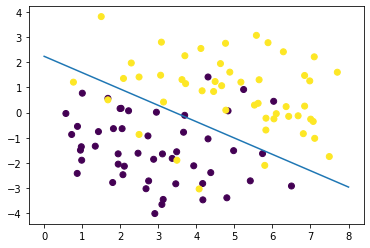

In [4]:
# plot the training data (x axis: first feature, y axis: second feature), use different labels for the two classes
plt.scatter(X_data[:,0], X_data[:,1], c = y_data[:,0])
# on the same figure, plot the boundary, a straight line showing the boundary separating p>0.5 from p<=0.5
x = np.linspace(0,8,100)
y = -(myRegression.theta[0] + myRegression.theta[1] * x) / myRegression.theta[2]
plt.plot(x,y)
print("Coefficients of linear decision boundary: intercept = %s, slope = %s"%(-(myRegression.theta[0] / myRegression.theta[2]) , -(myRegression.theta[1] / myRegression.theta[2])))